# Phase Portraits for Planar Systems

## Solve ODE system

$
\begin{cases}
x' = x + y \\
y' = x
\end{cases}
$

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


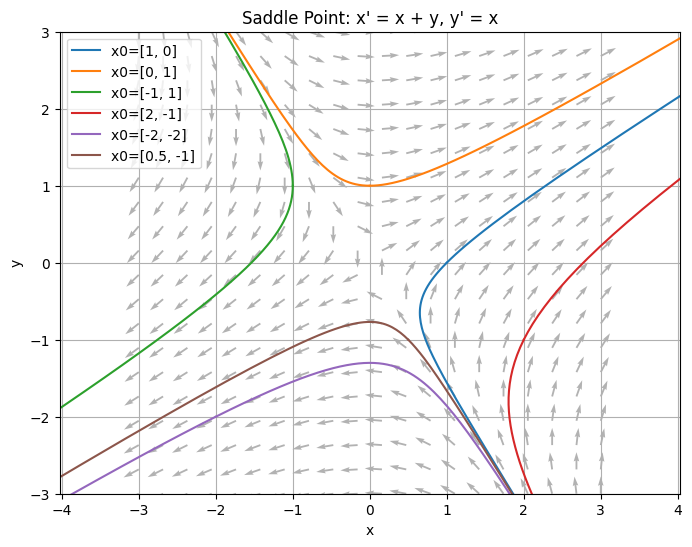

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

A = np.array([[1, 1],
              [1, 0]])

def f(t, X):
    return A @ X

x_vals = np.linspace(-3, 3, 20)
y_vals = np.linspace(-3, 3, 20)
X, Y = np.meshgrid(x_vals, y_vals)

U = X + Y
V = X

N = np.sqrt(U**2 + V**2)
N[N == 0] = 1
U = U / N * 0.4
V = V / N * 0.4

plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, color="gray", alpha=0.6)

t_forward = np.linspace(0, 10, 200)
t_backward = np.linspace(0, -10, 200)

initial_conditions = [
    [1, 0],
    [0, 1],
    [-1, 1],
    [2, -1],
    [-2, -2],
    [0.5, -1]
]

colors = plt.cm.tab10.colors

for i, x0 in enumerate(initial_conditions):
    color = colors[i % len(colors)]
    sol_f = solve_ivp(f, (0, 10), x0, t_eval=t_forward)
    sol_b = solve_ivp(f, (0, -10), x0, t_eval=t_backward)
    plt.plot(sol_f.y[0], sol_f.y[1], color=color, linestyle='-', label=f"x0={x0}")
    plt.plot(sol_b.y[0], sol_b.y[1], color=color, linestyle='-')

plt.xlabel('x')
plt.ylabel('y')
plt.title("Saddle Point: x' = x + y, y' = x")
plt.grid()
plt.axis('equal')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.legend()
plt.show()
